In [1]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold


In [2]:

# df_TagDesc = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv')

# df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
# df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# # Concatenate (union) the dataframes
# df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

df_All = pd.read_csv(r'C:\Users\austinsh\Project-OptiC4\III Models\3 Model C4\5 Preprocessing - Slecected Features\Merge Data\merged_data.csv')

print(df_All.head())


                  Date  425_pct_Al  C4_pct_Eth  C4_pct_H2O  \
0  2012-05-16 15:00:00    6.306930    2.505710    21.95810   
1  2012-05-16 16:00:00    6.307280    2.507065    21.96075   
2  2012-05-16 18:00:00    6.308335    2.511135    21.96865   
3  2012-05-16 19:00:00    6.309390    2.515210    21.97655   
4  2012-05-16 20:00:00    6.310090    2.517925    21.98185   

   HydWtr_pct_Ammonia  HydWtr_Na2O    Butanol   DI55102   DI55152    FC55003  \
0            0.909887     2.618940  58.526500  0.970151  0.924718  4968.4400   
1            0.909326     2.665560  58.526500  0.970151  0.924718  4968.4400   
2            0.907643     2.805415  56.692400  0.970151  0.924718  4968.4400   
3            0.905959     2.945270  56.692400  0.970151  0.924718  4968.4400   
4            0.904837     3.038505  53.635533  0.970441  0.923875  5205.8625   

    FC55552   FC55569    FC55576  FFC55555    LC55557    LC90366   LC90368  \
0  41476.45  6915.395  338.08450  0.751216  65.844650  62.291900  51

In [3]:
# Set max columns to display
pd.set_option('display.max_columns', None)

In [4]:
# # # List of columns to exclude from the XGboost feature selection results
# exclude_columns = [
#                      'LC55553',
#                      'TC55555',
#                      'PI55020',
#                      'TC55553',
#                      'TI55021',
#                      'LC55553',
#                      'LC55568',
#                      'TI40050',
#                      'TI55023',
#                      'PI55004',
#                      'M_Value',
#                      'FFC55553',
#                      'DI55580',
#                      'Al2O3',
#                      'C4_pct_Hex',
#                      'LC52572'

# #                  'Date',
# #                  'C4_pct_Hex', 'HydWtr_Na2O',
# #                  'TC55555'  
#                    ]

# # # Create a new DataFrame without the excluded columnsd
# df_All = df_All.drop(columns=exclude_columns)

In [5]:
df_All.columns

Index(['Date', '425_pct_Al', 'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia',
       'HydWtr_Na2O', 'Butanol', 'DI55102', 'DI55152', 'FC55003', 'FC55552',
       'FC55569', 'FC55576', 'FFC55555', 'LC55557', 'LC90366', 'LC90368',
       'TC55552'],
      dtype='object')

In [6]:
# df_All = df_All[df_All['Date'] > '2020-06-15 00:00:00']

In [7]:
# df_All.drop('Date', axis=1, inplace=True)




In [8]:
print(df_All.describe())

         425_pct_Al    C4_pct_Eth    C4_pct_H2O  HydWtr_pct_Ammonia  \
count  51276.000000  51276.000000  51276.000000        51276.000000   
mean       6.152588      1.231772     21.188208            0.970657   
std        0.259628      0.729174      2.741787            0.153773   
min        5.177355      0.013766      8.149630            0.350110   
25%        6.008113      0.629518     18.834550            0.875848   
50%        6.144065      1.113405     21.447150            0.941068   
75%        6.296436      1.692414     23.330850            1.033934   
max        7.134450     11.732650     34.572900            1.629130   

        HydWtr_Na2O       Butanol       DI55102       DI55152       FC55003  \
count  51276.000000  51276.000000  51276.000000  51276.000000  51276.000000   
mean       0.809336      9.958234      0.943682      0.933156   5996.390810   
std        0.693879     10.083304      0.053981      0.030079    775.846358   
min        0.002854      0.361524      0.800

In [9]:
# Assuming your data is in filtered_df and you want to predict 'target_column_name'
X = df_All.drop(['Butanol', 'Date'], axis=1)  # Replace 'target_column_name' with your target column's name
y = df_All['Butanol']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    learning_rate=0.05,
    n_estimators=800,
    max_depth=10,
    subsample=0.6,
    colsample_bytree=1,
    gamma=0,
    alpha=0.1,
    reg_lambda=1.5,
    colsample_bylevel=0.8,
    colsample_bynode=0.7
)
xgb_model.fit(X_train, y_train)

XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=0.7, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
# Predict on training data
y_train_pred = xgb_model.predict(X_train)

# Evaluate the model on training data
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error on Training Data: {mse_train}")



# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the Testing Data: {mse}")

rmse_train = np.sqrt(mse_train)
print(f"Root Mean Squared Error on Training Data: {rmse_train}")


rmse = np.sqrt(mse)
print(f"Root Mean Squared Error on the Testing Data: {rmse}")

# Calculate R-squared
r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared value on Training Data:: {r2_train:.2f}")


# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared value on the Testing Data: {r2:.2f}")

current_features = X.columns.tolist()

# Calculate Adjusted R-squared
def adjusted_r2(r2, n, k):
    """
    Compute the adjusted R^2 from R^2, number of samples (n) and number of predictors (k).
    
    Args:
    - r2 (float): R^2 value
    - n (int): number of samples
    - k (int): number of predictors

    Returns:
    - float: adjusted R^2 value
    """
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)


adj_r2 = adjusted_r2(r2, len(y_test), len(current_features))

print(f"Adjusted R^2 value: {adj_r2}")

Mean Squared Error on Training Data: 0.1145020659631298
Mean Squared Error on the Testing Data: 2.7249332893753984
Root Mean Squared Error on Training Data: 0.338381539040075
Root Mean Squared Error on the Testing Data: 1.6507371957326817
R-squared value on Training Data:: 1.00
R-squared value on the Testing Data: 0.97
Adjusted R^2 value: 0.9724484391712872


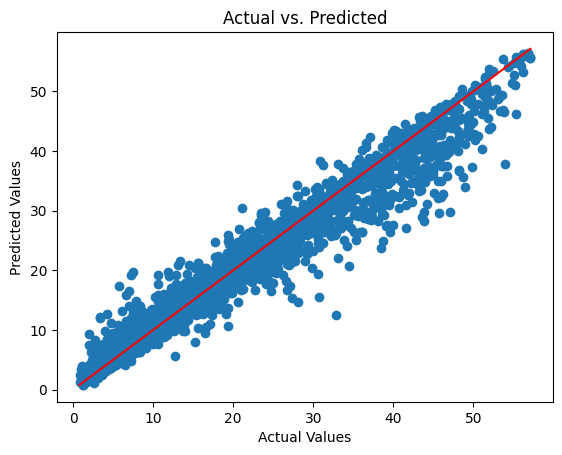

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted')

# Calculate the min and max values across both y_test and y_pred
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

# Plot the red 1:1 line
plt.plot([min_val, max_val], [min_val, max_val], color='red')  # 1:1 line

plt.show()


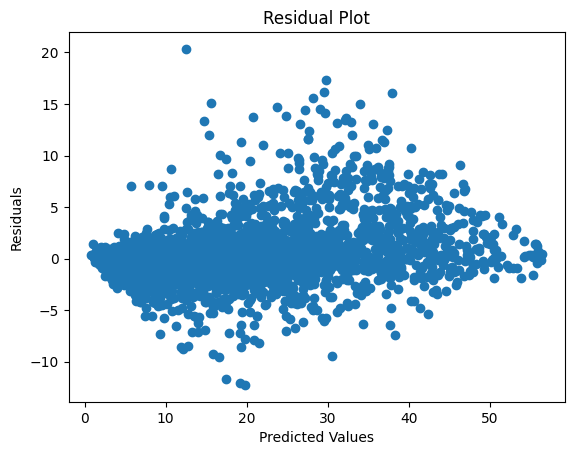

In [14]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [15]:
num_rows = df_All.shape[0]

splits = num_rows//10000

if splits < 5:
    splits = 5

In [16]:
# Define the K-fold cross validator
kfold = KFold(n_splits=splits, shuffle=True, random_state=42)

# Perform K-fold cross-validation
scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')

# Take the square root of the scores to get the RMSE
rmse_scores = np.sqrt(-scores)

# Print out the results
print(f'Scores for each fold are: {rmse_scores}')
print(f'Average RMSE: {np.mean(rmse_scores)}')
print(f'Standard deviation of RMSE: {np.std(rmse_scores)}')

Scores for each fold are: [2.09607408 1.91243052 1.9373778  2.04307222 1.89814989]
Average RMSE: 1.9774208998747507
Standard deviation of RMSE: 0.07810219538042443


In [17]:
df_All.columns

Index(['Date', '425_pct_Al', 'C4_pct_Eth', 'C4_pct_H2O', 'HydWtr_pct_Ammonia',
       'HydWtr_Na2O', 'Butanol', 'DI55102', 'DI55152', 'FC55003', 'FC55552',
       'FC55569', 'FC55576', 'FFC55555', 'LC55557', 'LC90366', 'LC90368',
       'TC55552'],
      dtype='object')